In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-10 08:12:56.429769


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1794.6162)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(5.9370)tensor(8.2577)tensor(5.1632)tensor(6.0913)tensor(4.4710)tensor(2.5359)tensor(4.0795)tensor(4.4973)tensor(7.1413)tensor(4.9367)tensor(3.8618)tensor(3.1472)tensor(9.1447)tensor(3.7673)tensor(5.6568)tensor(3.5018)tensor(5.6857)tensor(2.8066)tensor(5.9336)tensor(3.1185)tensor(3.2595)tensor(3.8917)tensor(4.7187)tensor(4.9654)tensor(5.4731)tensor(5.4620)tensor(10.)tensor(8.1318)tensor(3.3304)tensor(3.9521)tensor(5.3224)tensor(4.1328)tensor(3.1737)tensor(4.1703)tensor(6.0498)tensor(3.5720)tensor(7.8258)tensor(2.2609)tensor(3.9547)tensor(4.5995)tensor(3.6710)tensor(2.4482)tensor(2.4961)tensor(3.7185)tensor(3.0778)tensor(3.5999)tensor(6.5308)tensor(3.6182)tensor(4.8262)tensor(3.2344)tensor(4.0564)tensor(4.4220)tensor(2.8452)tensor(3.8182)tensor(5.9190)tensor(3.5362)tensor(3.9385)tensor(2.6691)tensor(6.9965)tensor(6.3307)tensor(6.1589)tensor(4.4479)tensor(2.6372)tensor(7.3995)tensor(4.2530)tensor(5.3231)tensor(7.0172)tensor(5.6138)tensor(3.1229)tensor(6.4001)tensor(5.8284)tensor(6.

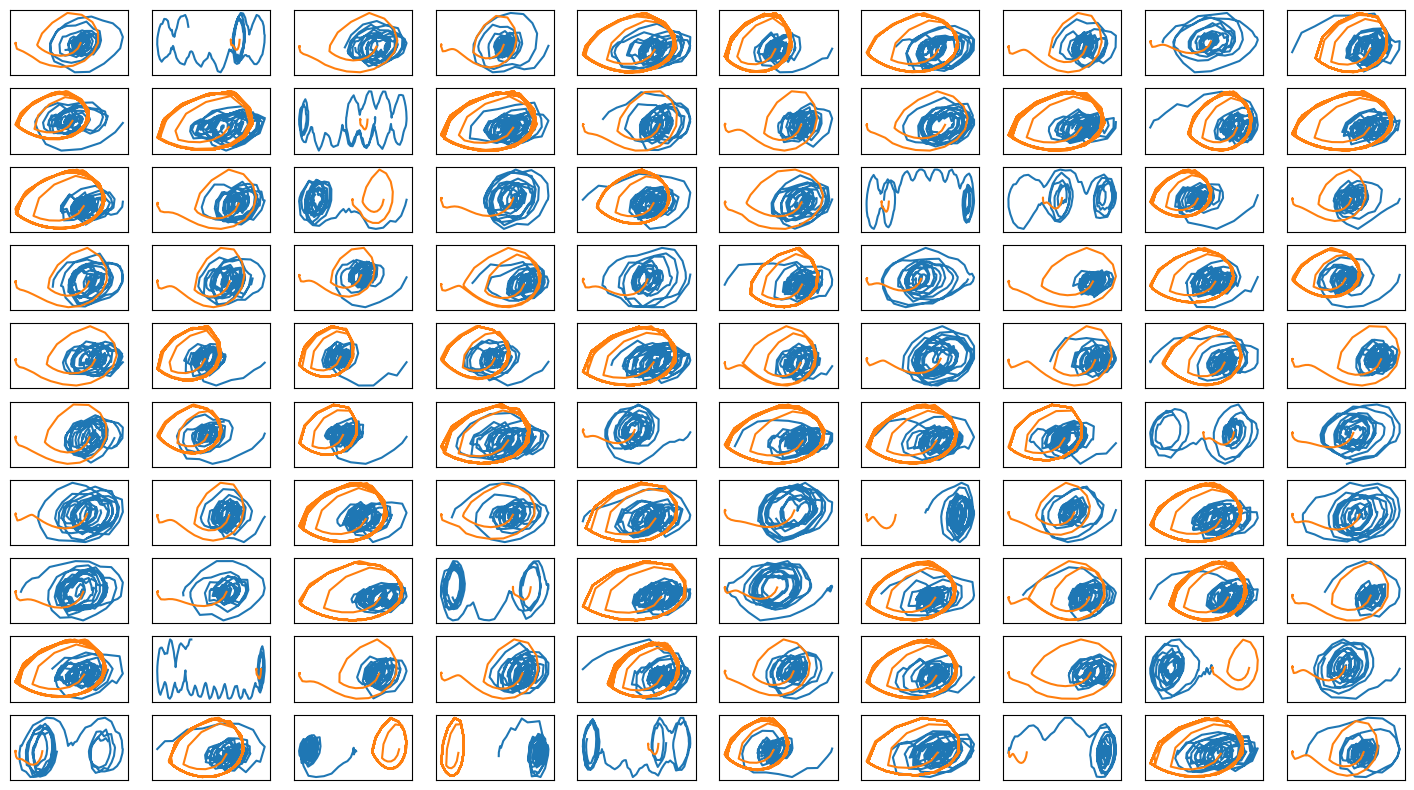

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 668.25373  validloss 571.19772±0.00000  bestvalidloss 571.19772  last_update 0
train: iter 1  trainloss 406.15462  validloss 405.99504±0.00000  bestvalidloss 405.99504  last_update 0
train: iter 2  trainloss 559.21778  validloss 373.98890±0.00000  bestvalidloss 373.98890  last_update 0
train: iter 3  trainloss 433.34373  validloss 368.37591±0.00000  bestvalidloss 368.37591  last_update 0
train: iter 4  trainloss 357.62402  validloss 357.72499±0.00000  bestvalidloss 357.72499  last_update 0
train: iter 5  trainloss 331.58531  validloss 330.28797±0.00000  bestvalidloss 330.28797  last_update 0
train: iter 6  trainloss 304.35993  validloss 305.31604±0.00000  bestvalidloss 305.31604  last_update 0
train: iter 7  trainloss 275.52206  validloss 277.89871±0.00000  bestvalidloss 277.89871  last_update 0
train: iter 8  trainloss 236.22067  validloss 243.55513±0.00000  bestvalidloss 243.55513  last_update 0
train: iter 9  trainloss 188.32269  validloss

train: iter 77  trainloss 64.33738  validloss 45.11519±0.00000  bestvalidloss -472.69180  last_update 19
train: iter 78  trainloss 42.53436  validloss 21.65353±0.00000  bestvalidloss -472.69180  last_update 20
train: iter 79  trainloss 20.17707  validloss -0.02493±0.00000  bestvalidloss -472.69180  last_update 21
train: iter 80  trainloss -0.56285  validloss -22.22002±0.00000  bestvalidloss -472.69180  last_update 22
train: iter 81  trainloss -17.64791  validloss -44.15858±0.00000  bestvalidloss -472.69180  last_update 23
train: iter 82  trainloss -32.48021  validloss -59.36372±0.00000  bestvalidloss -472.69180  last_update 24
train: iter 83  trainloss -45.41789  validloss -72.61726±0.00000  bestvalidloss -472.69180  last_update 25
train: iter 84  trainloss -53.74355  validloss -84.67184±0.00000  bestvalidloss -472.69180  last_update 26
train: iter 85  trainloss -61.96466  validloss -93.02057±0.00000  bestvalidloss -472.69180  last_update 27
train: iter 86  trainloss -68.34784  validlo

train: iter 153  trainloss -432.27809  validloss -506.81935±0.00000  bestvalidloss -524.11788  last_update 1
train: iter 154  trainloss -440.02815  validloss -500.74325±0.00000  bestvalidloss -524.11788  last_update 2
train: iter 155  trainloss -440.15948  validloss -520.68139±0.00000  bestvalidloss -524.11788  last_update 3
train: iter 156  trainloss -443.63765  validloss -509.93950±0.00000  bestvalidloss -524.11788  last_update 4
train: iter 157  trainloss -456.09658  validloss -528.01884±0.00000  bestvalidloss -528.01884  last_update 0
train: iter 158  trainloss -450.43384  validloss -543.29312±0.00000  bestvalidloss -543.29312  last_update 0
train: iter 159  trainloss -464.02416  validloss -502.33456±0.00000  bestvalidloss -543.29312  last_update 1
train: iter 160  trainloss -460.13098  validloss -542.66043±0.00000  bestvalidloss -543.29312  last_update 2
train: iter 161  trainloss -457.47607  validloss -551.75461±0.00000  bestvalidloss -551.75461  last_update 0
train: iter 162  tr

train: iter 230  trainloss -566.01142  validloss -647.00211±0.00000  bestvalidloss -680.86059  last_update 2
train: iter 231  trainloss -578.16166  validloss -676.80912±0.00000  bestvalidloss -680.86059  last_update 3
train: iter 232  trainloss -568.55071  validloss -664.86006±0.00000  bestvalidloss -680.86059  last_update 4
train: iter 233  trainloss -552.88620  validloss -658.59095±0.00000  bestvalidloss -680.86059  last_update 5
train: iter 234  trainloss -545.38711  validloss -508.37435±0.00000  bestvalidloss -680.86059  last_update 6
train: iter 235  trainloss -575.42627  validloss -665.51393±0.00000  bestvalidloss -680.86059  last_update 7
train: iter 236  trainloss -563.46179  validloss -681.88328±0.00000  bestvalidloss -681.88328  last_update 0
train: iter 237  trainloss -583.14080  validloss -662.33299±0.00000  bestvalidloss -681.88328  last_update 1
train: iter 238  trainloss -582.47206  validloss -617.55987±0.00000  bestvalidloss -681.88328  last_update 2
train: iter 239  tr

train: iter 306  trainloss -623.54170  validloss -706.91735±0.00000  bestvalidloss -727.64936  last_update 7
train: iter 307  trainloss -587.25857  validloss -731.21207±0.00000  bestvalidloss -731.21207  last_update 0
train: iter 308  trainloss -582.13838  validloss -690.47061±0.00000  bestvalidloss -731.21207  last_update 1
train: iter 309  trainloss -591.49242  validloss -728.32813±0.00000  bestvalidloss -731.21207  last_update 2
train: iter 310  trainloss -588.36677  validloss -698.45091±0.00000  bestvalidloss -731.21207  last_update 3
train: iter 311  trainloss -576.45586  validloss -601.91113±0.00000  bestvalidloss -731.21207  last_update 4
train: iter 312  trainloss -590.99174  validloss -683.56595±0.00000  bestvalidloss -731.21207  last_update 5
train: iter 313  trainloss 7803.81067  validloss -703.52300±0.00000  bestvalidloss -731.21207  last_update 6
train: iter 314  trainloss 273.87600  validloss 54.63394±0.00000  bestvalidloss -731.21207  last_update 7
train: iter 315  train

train: iter 382  trainloss -643.62769  validloss -743.01401±0.00000  bestvalidloss -743.03735  last_update 12
train: iter 383  trainloss -638.03731  validloss -733.52541±0.00000  bestvalidloss -743.03735  last_update 13
train: iter 384  trainloss -646.27991  validloss -717.26270±0.00000  bestvalidloss -743.03735  last_update 14
train: iter 385  trainloss -572.69456  validloss -725.77634±0.00000  bestvalidloss -743.03735  last_update 15
train: iter 386  trainloss -594.57752  validloss -664.15017±0.00000  bestvalidloss -743.03735  last_update 16
train: iter 387  trainloss -620.53088  validloss -664.88306±0.00000  bestvalidloss -743.03735  last_update 17
train: iter 388  trainloss -618.04066  validloss -724.59528±0.00000  bestvalidloss -743.03735  last_update 18
train: iter 389  trainloss -433.87054  validloss -713.16070±0.00000  bestvalidloss -743.03735  last_update 19
train: iter 390  trainloss 974.65249  validloss -655.21007±0.00000  bestvalidloss -743.03735  last_update 20
train: iter

train: iter 457  trainloss -624.20555  validloss -714.32347±0.00000  bestvalidloss -753.14958  last_update 10
train: iter 458  trainloss -637.98631  validloss -754.29715±0.00000  bestvalidloss -754.29715  last_update 0
train: iter 459  trainloss -652.41592  validloss -742.36300±0.00000  bestvalidloss -754.29715  last_update 1
train: iter 460  trainloss -657.68768  validloss -743.10092±0.00000  bestvalidloss -754.29715  last_update 2
train: iter 461  trainloss -655.19158  validloss -755.44585±0.00000  bestvalidloss -755.44585  last_update 0
train: iter 462  trainloss -604.73971  validloss -702.94573±0.00000  bestvalidloss -755.44585  last_update 1
train: iter 463  trainloss -631.90863  validloss -696.03368±0.00000  bestvalidloss -755.44585  last_update 2
train: iter 464  trainloss -601.84537  validloss -710.21151±0.00000  bestvalidloss -755.44585  last_update 3
train: iter 465  trainloss -231.47326  validloss -560.53098±0.00000  bestvalidloss -755.44585  last_update 4
train: iter 466  t

train: iter 532  trainloss -665.33320  validloss -762.16287±0.00000  bestvalidloss -762.16287  last_update 0
train: iter 533  trainloss -668.79868  validloss -761.38978±0.00000  bestvalidloss -762.16287  last_update 1
train: iter 534  trainloss -677.73072  validloss -721.95761±0.00000  bestvalidloss -762.16287  last_update 2
train: iter 535  trainloss -649.31038  validloss -765.64062±0.00000  bestvalidloss -765.64062  last_update 0
train: iter 536  trainloss -654.73508  validloss -723.29610±0.00000  bestvalidloss -765.64062  last_update 1
train: iter 537  trainloss -661.95850  validloss -723.38558±0.00000  bestvalidloss -765.64062  last_update 2
train: iter 538  trainloss -664.53135  validloss -754.19562±0.00000  bestvalidloss -765.64062  last_update 3
train: iter 539  trainloss -658.18110  validloss -748.00117±0.00000  bestvalidloss -765.64062  last_update 4
train: iter 540  trainloss -661.87695  validloss -734.01021±0.00000  bestvalidloss -765.64062  last_update 5
train: iter 541  tr

train: iter 607  trainloss -680.47089  validloss -733.58992±0.00000  bestvalidloss -777.78001  last_update 39
train: iter 608  trainloss -691.65289  validloss -776.86983±0.00000  bestvalidloss -777.78001  last_update 40
train: iter 609  trainloss -689.72578  validloss -752.23983±0.00000  bestvalidloss -777.78001  last_update 41
train: iter 610  trainloss -662.90974  validloss -765.70774±0.00000  bestvalidloss -777.78001  last_update 42
train: iter 611  trainloss -678.87106  validloss -731.93961±0.00000  bestvalidloss -777.78001  last_update 43
train: iter 612  trainloss -672.67915  validloss -764.35377±0.00000  bestvalidloss -777.78001  last_update 44
train: iter 613  trainloss -666.92860  validloss -778.48435±0.00000  bestvalidloss -778.48435  last_update 0
train: iter 614  trainloss -673.15918  validloss -734.98137±0.00000  bestvalidloss -778.48435  last_update 1
train: iter 615  trainloss -683.66895  validloss -763.00330±0.00000  bestvalidloss -778.48435  last_update 2
train: iter 6

train: iter 682  trainloss -694.51412  validloss -773.30999±0.00000  bestvalidloss -791.72846  last_update 24
train: iter 683  trainloss -689.00180  validloss -787.34560±0.00000  bestvalidloss -791.72846  last_update 25
train: iter 684  trainloss -674.17930  validloss -766.59849±0.00000  bestvalidloss -791.72846  last_update 26
train: iter 685  trainloss -686.96879  validloss -769.69177±0.00000  bestvalidloss -791.72846  last_update 27
train: iter 686  trainloss -681.59768  validloss -787.35169±0.00000  bestvalidloss -791.72846  last_update 28
train: iter 687  trainloss -689.57614  validloss -766.51556±0.00000  bestvalidloss -791.72846  last_update 29
train: iter 688  trainloss -689.34931  validloss -783.07685±0.00000  bestvalidloss -791.72846  last_update 30
train: iter 689  trainloss -685.37619  validloss -752.83268±0.00000  bestvalidloss -791.72846  last_update 31
train: iter 690  trainloss -668.20935  validloss -733.86886±0.00000  bestvalidloss -791.72846  last_update 32
train: ite

train: iter 757  trainloss -713.62444  validloss -771.38965±0.00000  bestvalidloss -797.87073  last_update 51
train: iter 758  trainloss -697.64127  validloss -753.36525±0.00000  bestvalidloss -797.87073  last_update 52
train: iter 759  trainloss -704.86948  validloss -785.43659±0.00000  bestvalidloss -797.87073  last_update 53
train: iter 760  trainloss -676.22163  validloss -771.69949±0.00000  bestvalidloss -797.87073  last_update 54
train: iter 761  trainloss -694.24760  validloss -713.15877±0.00000  bestvalidloss -797.87073  last_update 55
train: iter 762  trainloss -696.55235  validloss -790.56327±0.00000  bestvalidloss -797.87073  last_update 56
train: iter 763  trainloss -688.43673  validloss -769.47198±0.00000  bestvalidloss -797.87073  last_update 57
train: iter 764  trainloss -697.43571  validloss -689.15036±0.00000  bestvalidloss -797.87073  last_update 58
train: iter 765  trainloss -708.69924  validloss -787.55955±0.00000  bestvalidloss -797.87073  last_update 59
train: ite

train: iter 832  trainloss -712.72787  validloss -817.51623±0.00000  bestvalidloss -817.51623  last_update 0
train: iter 833  trainloss -705.35024  validloss -781.14131±0.00000  bestvalidloss -817.51623  last_update 1
train: iter 834  trainloss -704.46133  validloss -763.06857±0.00000  bestvalidloss -817.51623  last_update 2
train: iter 835  trainloss -699.97265  validloss -798.04014±0.00000  bestvalidloss -817.51623  last_update 3
train: iter 836  trainloss -715.80025  validloss -798.84805±0.00000  bestvalidloss -817.51623  last_update 4
train: iter 837  trainloss -717.06971  validloss -777.99764±0.00000  bestvalidloss -817.51623  last_update 5
train: iter 838  trainloss -719.11698  validloss -804.27170±0.00000  bestvalidloss -817.51623  last_update 6
train: iter 839  trainloss -709.68190  validloss -781.49174±0.00000  bestvalidloss -817.51623  last_update 7
train: iter 840  trainloss -725.98304  validloss -779.09010±0.00000  bestvalidloss -817.51623  last_update 8
train: iter 841  tr

train: iter 908  trainloss -746.26500  validloss -834.82349±0.00000  bestvalidloss -839.66122  last_update 9
train: iter 909  trainloss -756.76358  validloss -836.83084±0.00000  bestvalidloss -839.66122  last_update 10
train: iter 910  trainloss -704.47021  validloss -840.18741±0.00000  bestvalidloss -840.18741  last_update 0
train: iter 911  trainloss -724.89020  validloss -714.79512±0.00000  bestvalidloss -840.18741  last_update 1
train: iter 912  trainloss -730.40581  validloss -821.99190±0.00000  bestvalidloss -840.18741  last_update 2
train: iter 913  trainloss -750.74486  validloss -816.03889±0.00000  bestvalidloss -840.18741  last_update 3
train: iter 914  trainloss -758.44327  validloss -847.27186±0.00000  bestvalidloss -847.27186  last_update 0
train: iter 915  trainloss -751.48706  validloss -777.89325±0.00000  bestvalidloss -847.27186  last_update 1
train: iter 916  trainloss -740.31703  validloss -850.98554±0.00000  bestvalidloss -850.98554  last_update 0
train: iter 917  t

train: iter 983  trainloss -782.53667  validloss -873.18710±0.00000  bestvalidloss -876.49223  last_update 20
train: iter 984  trainloss -758.87636  validloss -829.85712±0.00000  bestvalidloss -876.49223  last_update 21
train: iter 985  trainloss -772.01533  validloss -861.60720±0.00000  bestvalidloss -876.49223  last_update 22
train: iter 986  trainloss -786.00901  validloss -866.80931±0.00000  bestvalidloss -876.49223  last_update 23
train: iter 987  trainloss -788.14430  validloss -809.79335±0.00000  bestvalidloss -876.49223  last_update 24
train: iter 988  trainloss -785.88683  validloss -878.27939±0.00000  bestvalidloss -878.27939  last_update 0
train: iter 989  trainloss -765.92095  validloss -821.13240±0.00000  bestvalidloss -878.27939  last_update 1
train: iter 990  trainloss -776.46457  validloss -837.73032±0.00000  bestvalidloss -878.27939  last_update 2
train: iter 991  trainloss -788.01861  validloss -861.28265±0.00000  bestvalidloss -878.27939  last_update 3
train: iter 99

train: iter 1058  trainloss -821.92320  validloss -898.98732±0.00000  bestvalidloss -905.54239  last_update 5
train: iter 1059  trainloss -817.16612  validloss -906.96618±0.00000  bestvalidloss -906.96618  last_update 0
train: iter 1060  trainloss -798.78171  validloss -876.77386±0.00000  bestvalidloss -906.96618  last_update 1
train: iter 1061  trainloss -679.87812  validloss -683.89406±0.00000  bestvalidloss -906.96618  last_update 2
train: iter 1062  trainloss -753.30919  validloss -756.34977±0.00000  bestvalidloss -906.96618  last_update 3
train: iter 1063  trainloss -800.44814  validloss -845.47636±0.00000  bestvalidloss -906.96618  last_update 4
train: iter 1064  trainloss -767.87768  validloss -887.88204±0.00000  bestvalidloss -906.96618  last_update 5
train: iter 1065  trainloss -730.72629  validloss -852.60799±0.00000  bestvalidloss -906.96618  last_update 6
train: iter 1066  trainloss -814.38629  validloss -863.52945±0.00000  bestvalidloss -906.96618  last_update 7
train: ite

train: iter 1133  trainloss -736.48691  validloss -879.09165±0.00000  bestvalidloss -926.92772  last_update 5
train: iter 1134  trainloss -814.05179  validloss -779.49558±0.00000  bestvalidloss -926.92772  last_update 6
train: iter 1135  trainloss -845.46984  validloss -913.06637±0.00000  bestvalidloss -926.92772  last_update 7
train: iter 1136  trainloss -824.17153  validloss -906.36618±0.00000  bestvalidloss -926.92772  last_update 8
train: iter 1137  trainloss -842.05263  validloss -917.96287±0.00000  bestvalidloss -926.92772  last_update 9
train: iter 1138  trainloss -828.74640  validloss -853.26982±0.00000  bestvalidloss -926.92772  last_update 10
train: iter 1139  trainloss -832.80067  validloss -845.62748±0.00000  bestvalidloss -926.92772  last_update 11
train: iter 1140  trainloss -312.92936  validloss -659.44865±0.00000  bestvalidloss -926.92772  last_update 12
train: iter 1141  trainloss -673.77292  validloss -607.41351±0.00000  bestvalidloss -926.92772  last_update 13
train:

train: iter 1208  trainloss -858.33100  validloss -902.22093±0.00000  bestvalidloss -938.46767  last_update 1
train: iter 1209  trainloss -856.19566  validloss -930.16165±0.00000  bestvalidloss -938.46767  last_update 2
train: iter 1210  trainloss -831.84657  validloss -942.34868±0.00000  bestvalidloss -942.34868  last_update 0
train: iter 1211  trainloss -825.51221  validloss -918.21629±0.00000  bestvalidloss -942.34868  last_update 1
train: iter 1212  trainloss -844.98207  validloss -915.61939±0.00000  bestvalidloss -942.34868  last_update 2
train: iter 1213  trainloss -853.90567  validloss -943.75583±0.00000  bestvalidloss -943.75583  last_update 0
train: iter 1214  trainloss -856.55535  validloss -934.75649±0.00000  bestvalidloss -943.75583  last_update 1
train: iter 1215  trainloss -856.35813  validloss -919.02924±0.00000  bestvalidloss -943.75583  last_update 2
train: iter 1216  trainloss -857.29140  validloss -928.65622±0.00000  bestvalidloss -943.75583  last_update 3
train: ite

train: iter 1283  trainloss -832.32672  validloss -883.04972±0.00000  bestvalidloss -967.96844  last_update 3
train: iter 1284  trainloss -884.43598  validloss -935.58207±0.00000  bestvalidloss -967.96844  last_update 4
train: iter 1285  trainloss -814.29762  validloss -951.92362±0.00000  bestvalidloss -967.96844  last_update 5
train: iter 1286  trainloss -861.81432  validloss -915.29975±0.00000  bestvalidloss -967.96844  last_update 6
train: iter 1287  trainloss -867.83850  validloss -952.15912±0.00000  bestvalidloss -967.96844  last_update 7
train: iter 1288  trainloss -878.57904  validloss -905.97774±0.00000  bestvalidloss -967.96844  last_update 8
train: iter 1289  trainloss -837.31326  validloss -955.16241±0.00000  bestvalidloss -967.96844  last_update 9
train: iter 1290  trainloss -799.66845  validloss -903.98488±0.00000  bestvalidloss -967.96844  last_update 10
train: iter 1291  trainloss -867.09341  validloss -900.87868±0.00000  bestvalidloss -967.96844  last_update 11
train: i

train: iter 1357  trainloss -900.92870  validloss -961.14085±0.00000  bestvalidloss -969.07853  last_update 4
train: iter 1358  trainloss -855.18236  validloss -913.21984±0.00000  bestvalidloss -969.07853  last_update 5
train: iter 1359  trainloss -821.03116  validloss -801.05787±0.00000  bestvalidloss -969.07853  last_update 6
train: iter 1360  trainloss -882.06018  validloss -933.15762±0.00000  bestvalidloss -969.07853  last_update 7
train: iter 1361  trainloss -898.04341  validloss -910.62973±0.00000  bestvalidloss -969.07853  last_update 8
train: iter 1362  trainloss -844.83221  validloss -680.99198±0.00000  bestvalidloss -969.07853  last_update 9
train: iter 1363  trainloss -858.98449  validloss -853.91726±0.00000  bestvalidloss -969.07853  last_update 10
train: iter 1364  trainloss -808.90997  validloss -895.40507±0.00000  bestvalidloss -969.07853  last_update 11
train: iter 1365  trainloss -885.82854  validloss -931.76555±0.00000  bestvalidloss -969.07853  last_update 12
train: 

train: iter 1431  trainloss -894.34410  validloss -971.61210±0.00000  bestvalidloss -973.02332  last_update 3
train: iter 1432  trainloss -884.83716  validloss -875.44971±0.00000  bestvalidloss -973.02332  last_update 4
train: iter 1433  trainloss -899.66692  validloss -941.54691±0.00000  bestvalidloss -973.02332  last_update 5
train: iter 1434  trainloss -892.64316  validloss -962.89109±0.00000  bestvalidloss -973.02332  last_update 6
train: iter 1435  trainloss -893.81941  validloss -941.76287±0.00000  bestvalidloss -973.02332  last_update 7
train: iter 1436  trainloss -898.02470  validloss -922.78670±0.00000  bestvalidloss -973.02332  last_update 8
train: iter 1437  trainloss -899.91975  validloss -876.59694±0.00000  bestvalidloss -973.02332  last_update 9
train: iter 1438  trainloss -882.57457  validloss -964.71715±0.00000  bestvalidloss -973.02332  last_update 10
train: iter 1439  trainloss -887.76967  validloss -951.41684±0.00000  bestvalidloss -973.02332  last_update 11
train: i

train: iter 1505  trainloss -901.13434  validloss -939.16318±0.00000  bestvalidloss -982.54825  last_update 65
train: iter 1506  trainloss -896.60562  validloss -970.99928±0.00000  bestvalidloss -982.54825  last_update 66
train: iter 1507  trainloss -872.95388  validloss -950.28440±0.00000  bestvalidloss -982.54825  last_update 67
train: iter 1508  trainloss -883.78765  validloss -964.05514±0.00000  bestvalidloss -982.54825  last_update 68
train: iter 1509  trainloss -920.84131  validloss -939.96000±0.00000  bestvalidloss -982.54825  last_update 69
train: iter 1510  trainloss -896.38602  validloss -826.26721±0.00000  bestvalidloss -982.54825  last_update 70
train: iter 1511  trainloss -871.63289  validloss -898.16610±0.00000  bestvalidloss -982.54825  last_update 71
train: iter 1512  trainloss -884.68972  validloss -904.40197±0.00000  bestvalidloss -982.54825  last_update 72
train: iter 1513  trainloss -902.20523  validloss -981.95085±0.00000  bestvalidloss -982.54825  last_update 73
t

train: iter 1579  trainloss -737.32712  validloss -347.33480±0.00000  bestvalidloss -991.91529  last_update 24
train: iter 1580  trainloss -900.01678  validloss -929.02580±0.00000  bestvalidloss -991.91529  last_update 25
train: iter 1581  trainloss -915.15073  validloss -966.31235±0.00000  bestvalidloss -991.91529  last_update 26
train: iter 1582  trainloss -908.67508  validloss -956.76001±0.00000  bestvalidloss -991.91529  last_update 27
train: iter 1583  trainloss -933.24312  validloss -987.82038±0.00000  bestvalidloss -991.91529  last_update 28
train: iter 1584  trainloss -923.36718  validloss -920.29166±0.00000  bestvalidloss -991.91529  last_update 29
train: iter 1585  trainloss -902.90889  validloss -933.29227±0.00000  bestvalidloss -991.91529  last_update 30
train: iter 1586  trainloss -933.64282  validloss -987.30924±0.00000  bestvalidloss -991.91529  last_update 31
train: iter 1587  trainloss -883.42333  validloss -900.21224±0.00000  bestvalidloss -991.91529  last_update 32
t

train: iter 1653  trainloss -885.67501  validloss -893.13521±0.00000  bestvalidloss -995.20545  last_update 1
train: iter 1654  trainloss -933.44947  validloss -963.30565±0.00000  bestvalidloss -995.20545  last_update 2
train: iter 1655  trainloss -920.46429  validloss -975.19540±0.00000  bestvalidloss -995.20545  last_update 3
train: iter 1656  trainloss -930.46006  validloss -963.48089±0.00000  bestvalidloss -995.20545  last_update 4
train: iter 1657  trainloss -911.69956  validloss -935.52465±0.00000  bestvalidloss -995.20545  last_update 5
train: iter 1658  trainloss -850.44679  validloss -815.38165±0.00000  bestvalidloss -995.20545  last_update 6
train: iter 1659  trainloss -925.23528  validloss -975.79486±0.00000  bestvalidloss -995.20545  last_update 7
train: iter 1660  trainloss -940.11799  validloss -978.62886±0.00000  bestvalidloss -995.20545  last_update 8
train: iter 1661  trainloss -944.65886  validloss -913.33895±0.00000  bestvalidloss -995.20545  last_update 9
train: ite

train: iter 1728  trainloss -926.14346  validloss -862.20584±0.00000  bestvalidloss -1000.39287  last_update 20
train: iter 1729  trainloss -930.70798  validloss -923.04763±0.00000  bestvalidloss -1000.39287  last_update 21
train: iter 1730  trainloss -941.40952  validloss -955.87202±0.00000  bestvalidloss -1000.39287  last_update 22
train: iter 1731  trainloss -944.29111  validloss -965.84171±0.00000  bestvalidloss -1000.39287  last_update 23
train: iter 1732  trainloss -910.79749  validloss -887.11384±0.00000  bestvalidloss -1000.39287  last_update 24
train: iter 1733  trainloss -936.07555  validloss -982.44291±0.00000  bestvalidloss -1000.39287  last_update 25
train: iter 1734  trainloss -941.25862  validloss -963.41222±0.00000  bestvalidloss -1000.39287  last_update 26
train: iter 1735  trainloss -904.32305  validloss -925.13641±0.00000  bestvalidloss -1000.39287  last_update 27
train: iter 1736  trainloss -881.17378  validloss -1003.48290±0.00000  bestvalidloss -1003.48290  last_u

train: iter 1802  trainloss -945.55377  validloss -995.37630±0.00000  bestvalidloss -1014.56018  last_update 2
train: iter 1803  trainloss -948.74767  validloss -1006.35333±0.00000  bestvalidloss -1014.56018  last_update 3
train: iter 1804  trainloss -950.25364  validloss -905.05404±0.00000  bestvalidloss -1014.56018  last_update 4
train: iter 1805  trainloss -924.69170  validloss -994.63012±0.00000  bestvalidloss -1014.56018  last_update 5
train: iter 1806  trainloss -748.73057  validloss -950.94550±0.00000  bestvalidloss -1014.56018  last_update 6
train: iter 1807  trainloss -879.90315  validloss -886.04460±0.00000  bestvalidloss -1014.56018  last_update 7
train: iter 1808  trainloss -930.69119  validloss -1000.64540±0.00000  bestvalidloss -1014.56018  last_update 8
train: iter 1809  trainloss -953.68966  validloss -840.24795±0.00000  bestvalidloss -1014.56018  last_update 9
train: iter 1810  trainloss -902.70269  validloss -1001.74013±0.00000  bestvalidloss -1014.56018  last_update 

train: iter 1876  trainloss -967.78680  validloss -985.43116±0.00000  bestvalidloss -1014.56018  last_update 76
train: iter 1877  trainloss -955.33974  validloss -1013.93629±0.00000  bestvalidloss -1014.56018  last_update 77
train: iter 1878  trainloss -974.13710  validloss -1011.85365±0.00000  bestvalidloss -1014.56018  last_update 78
train: iter 1879  trainloss -852.84641  validloss -1007.20601±0.00000  bestvalidloss -1014.56018  last_update 79
train: iter 1880  trainloss -822.43059  validloss -777.27787±0.00000  bestvalidloss -1014.56018  last_update 80
train: iter 1881  trainloss -963.70465  validloss -1002.70853±0.00000  bestvalidloss -1014.56018  last_update 81
train: iter 1882  trainloss -953.56357  validloss -938.09278±0.00000  bestvalidloss -1014.56018  last_update 82
train: iter 1883  trainloss -921.55921  validloss -1004.97316±0.00000  bestvalidloss -1014.56018  last_update 83
train: iter 1884  trainloss -954.32700  validloss -989.12742±0.00000  bestvalidloss -1014.56018  la

train: iter 1950  trainloss -923.38034  validloss -995.53875±0.00000  bestvalidloss -1022.37099  last_update 22
train: iter 1951  trainloss -934.96709  validloss -980.68243±0.00000  bestvalidloss -1022.37099  last_update 23
train: iter 1952  trainloss -891.09441  validloss -1014.70145±0.00000  bestvalidloss -1022.37099  last_update 24
train: iter 1953  trainloss -966.52164  validloss -974.96425±0.00000  bestvalidloss -1022.37099  last_update 25
train: iter 1954  trainloss -978.32040  validloss -1002.15673±0.00000  bestvalidloss -1022.37099  last_update 26
train: iter 1955  trainloss -941.11570  validloss -1000.68807±0.00000  bestvalidloss -1022.37099  last_update 27
train: iter 1956  trainloss -943.49711  validloss -970.05952±0.00000  bestvalidloss -1022.37099  last_update 28
train: iter 1957  trainloss -974.06198  validloss -990.55382±0.00000  bestvalidloss -1022.37099  last_update 29
train: iter 1958  trainloss -960.65170  validloss -1000.79684±0.00000  bestvalidloss -1022.37099  las

train: iter 2024  trainloss -969.69665  validloss -983.22380±0.00000  bestvalidloss -1022.37099  last_update 96
train: iter 2025  trainloss -973.32175  validloss -1012.60635±0.00000  bestvalidloss -1022.37099  last_update 97
train: iter 2026  trainloss -964.95224  validloss -979.04307±0.00000  bestvalidloss -1022.37099  last_update 98
train: iter 2027  trainloss -957.07579  validloss -846.56657±0.00000  bestvalidloss -1022.37099  last_update 99
train: iter 2028  trainloss -961.44037  validloss -1022.20502±0.00000  bestvalidloss -1022.37099  last_update 100
train: fin
penalty_target_min tensor(-6.1621) penalty_target_max tensor(25.7490)


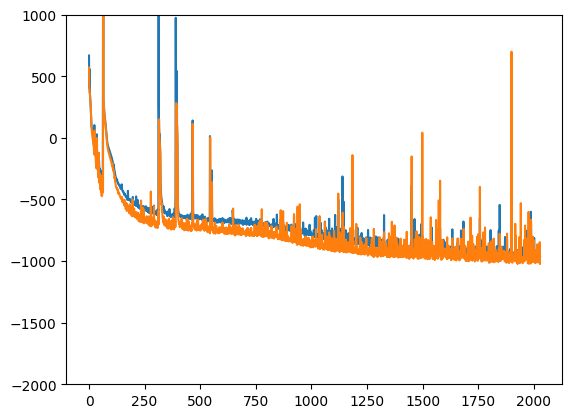

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


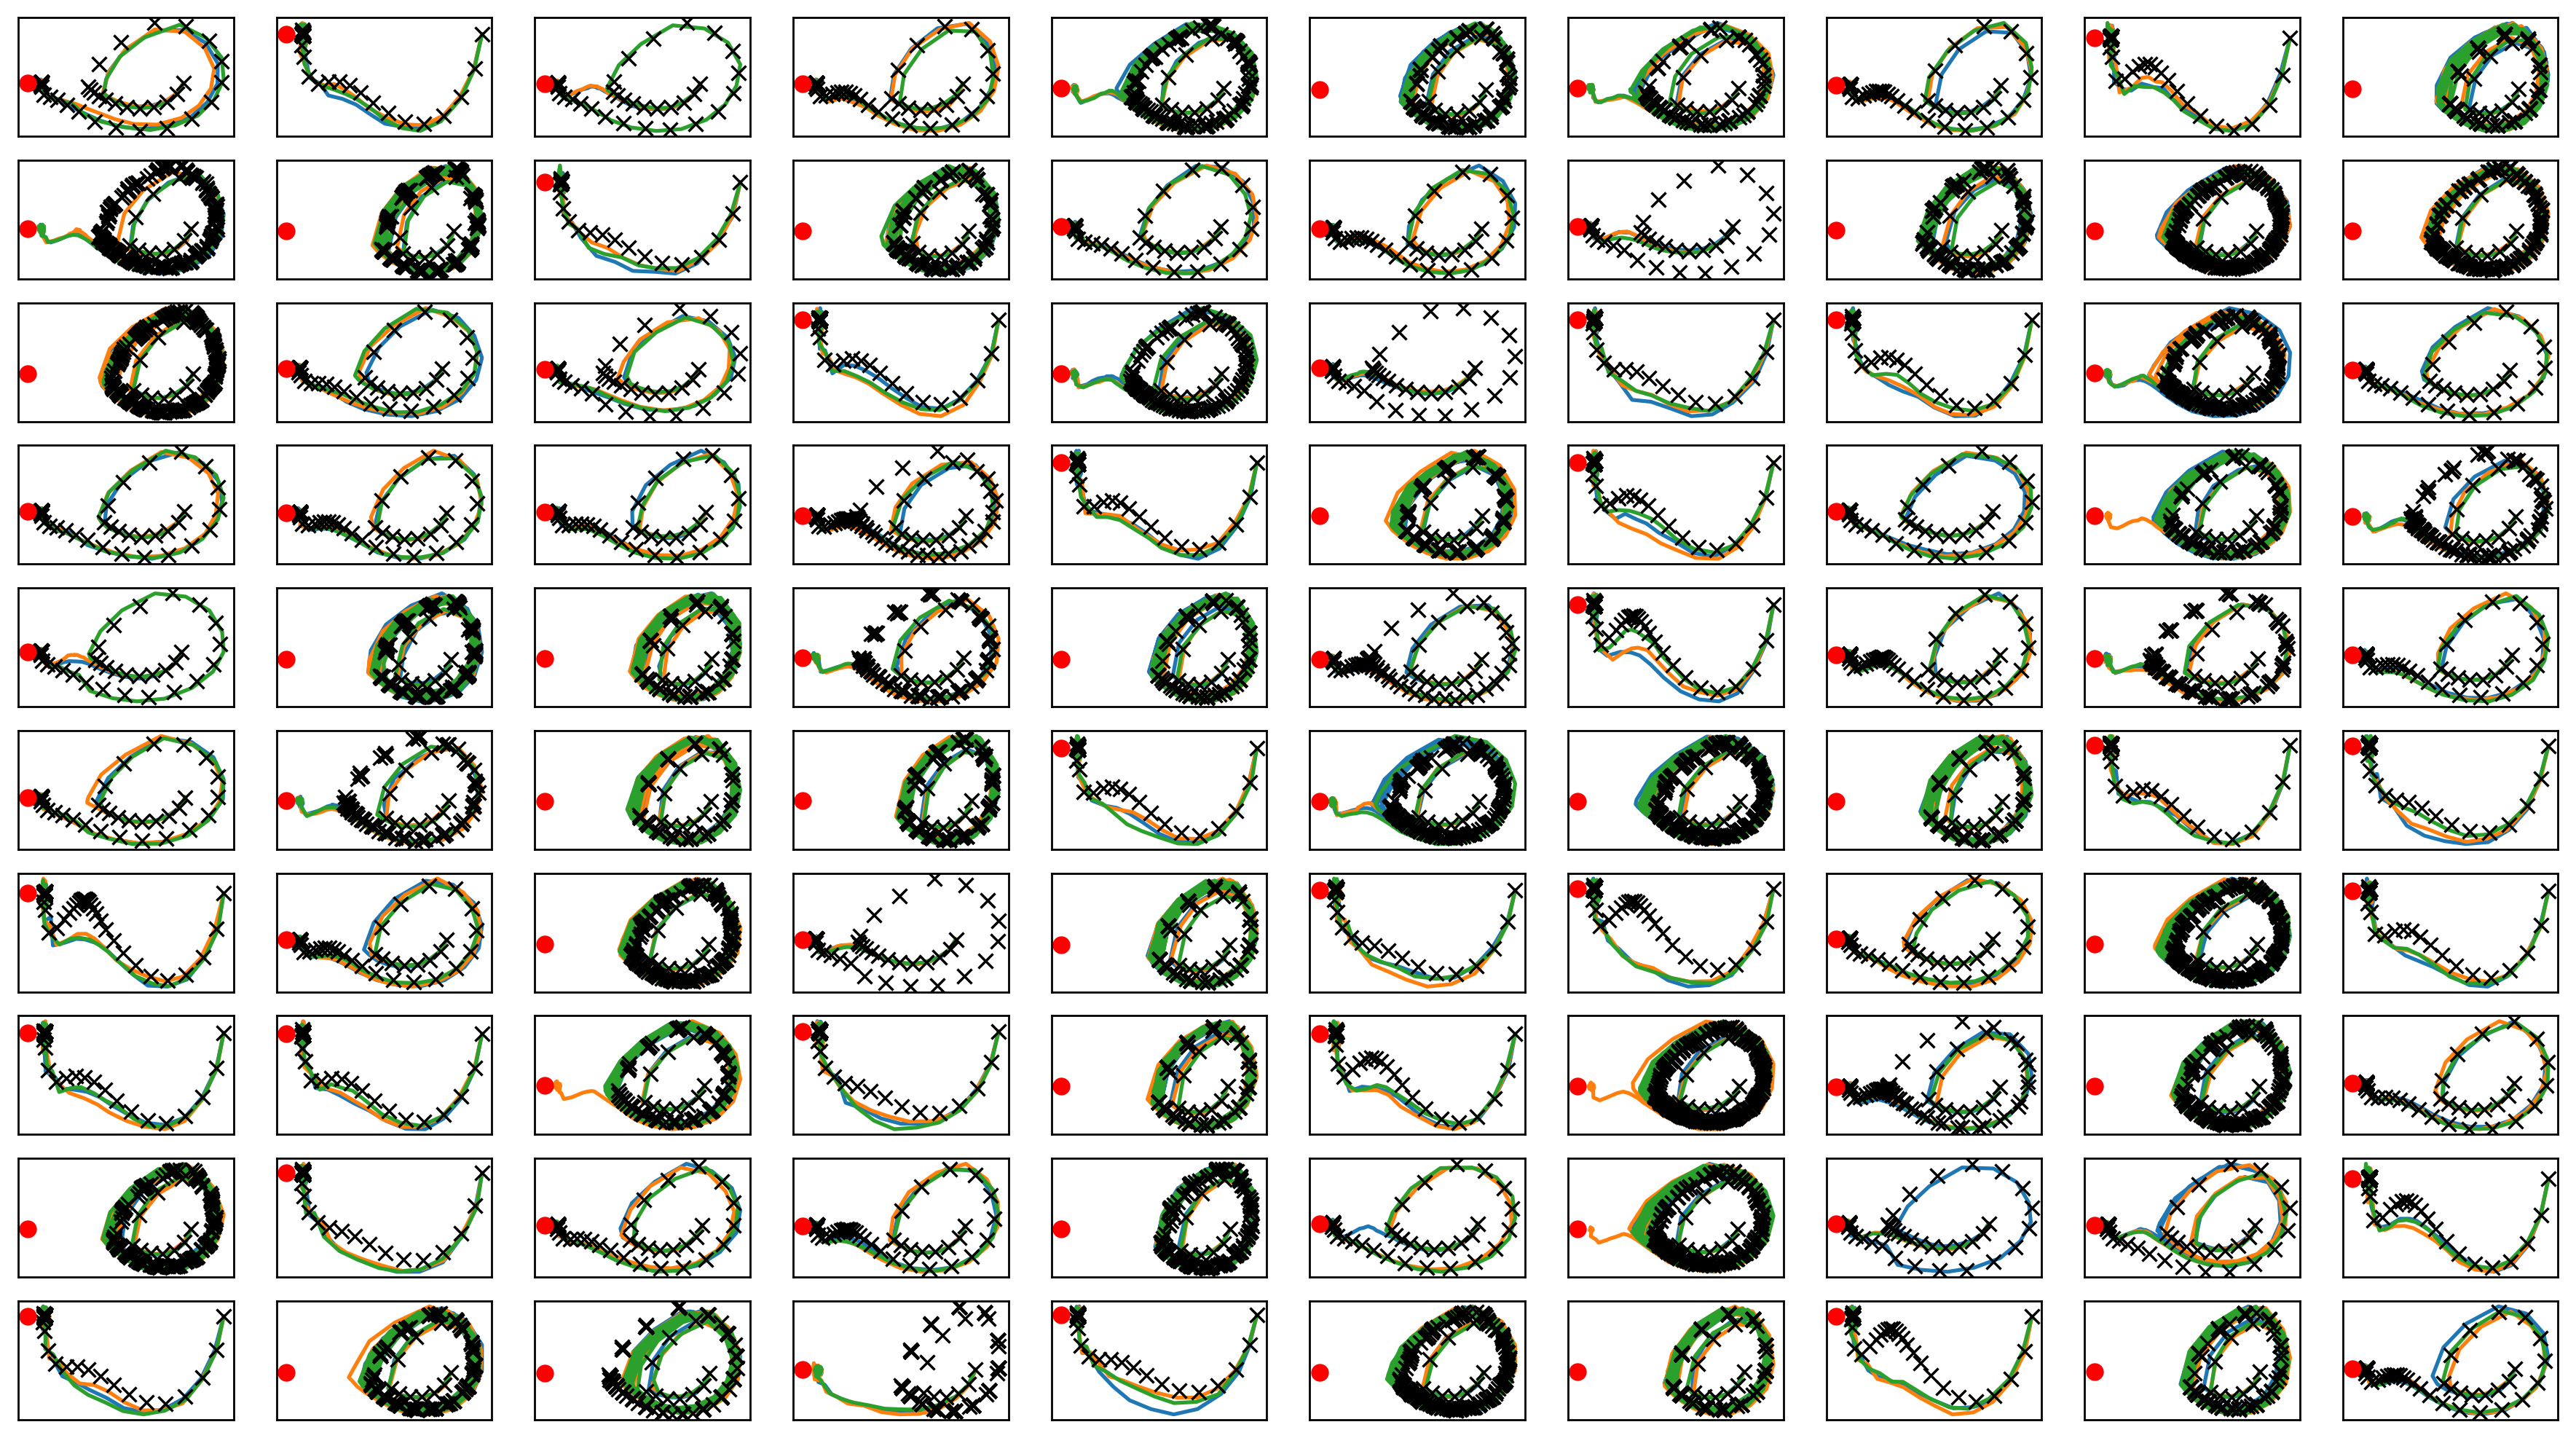

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

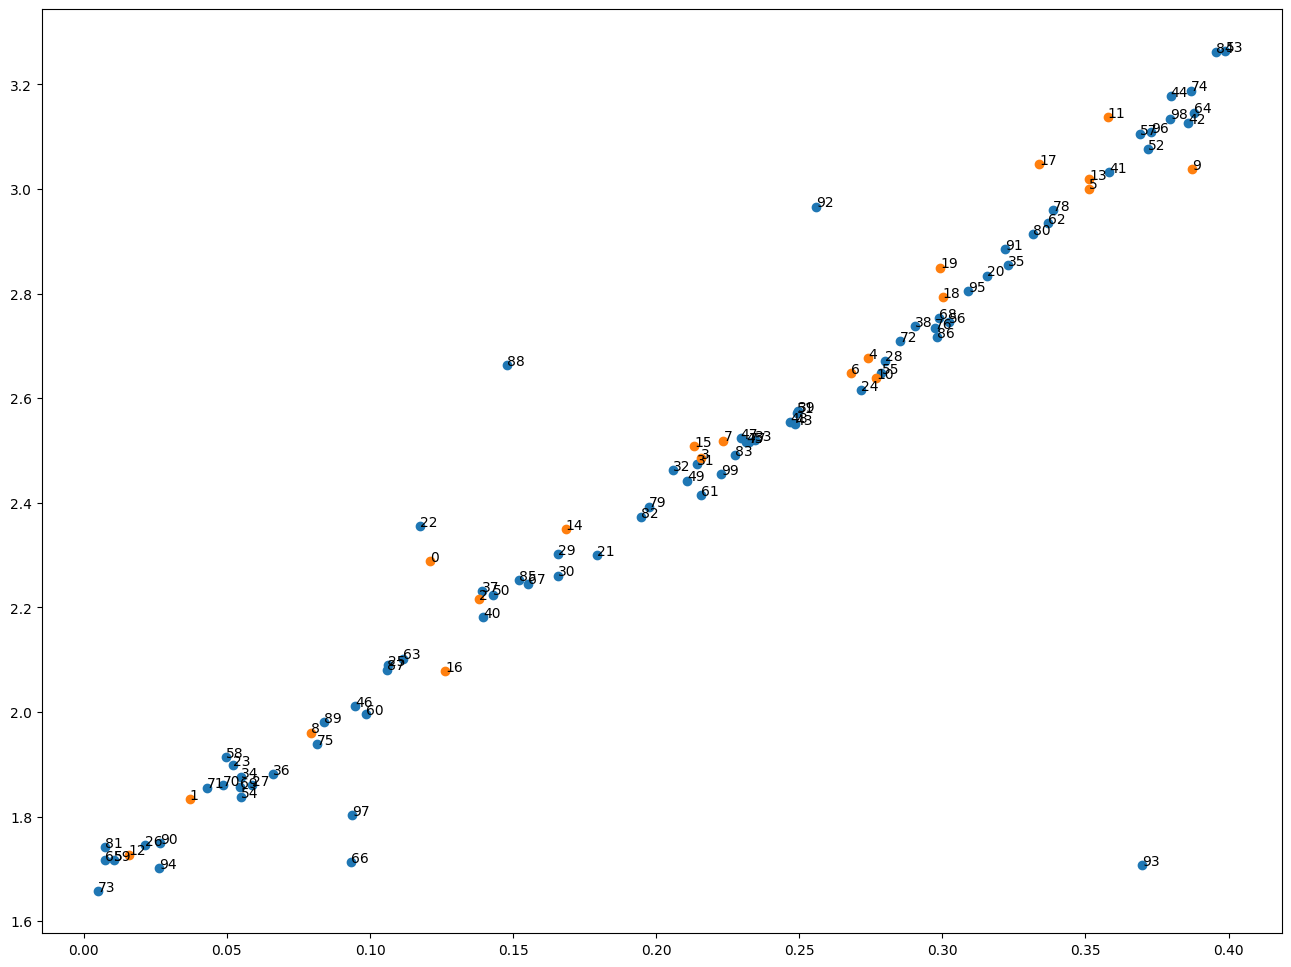

[0.12093303 0.03693544 0.13822429 0.21552669 0.2740878  0.35124697
 0.268187   0.22347593 0.0792406  0.38730463 0.27692905 0.35784267
 0.01562191 0.351257   0.16844305 0.21326611 0.12620625 0.33385027
 0.30005773 0.29926626 0.31571173 0.17915741 0.11744566 0.05201143
 0.27153421 0.10621866 0.02134502 0.05869143 0.27990334 0.1656224
 0.16567171 0.21435856 0.20595564 0.23462202 0.05498988 0.32295652
 0.06614168 0.13910634 0.29039919 0.24946888 0.13955934 0.35835449
 0.38593602 0.24867829 0.3797957  0.23135585 0.09481079 0.22947179
 0.24685797 0.21082324 0.1429079  0.24934405 0.37177489 0.39892914
 0.0548543  0.27872726 0.30218522 0.36920981 0.04970838 0.01048439
 0.09848443 0.21553243 0.33681236 0.11167347 0.3878383  0.00745892
 0.09318971 0.15514426 0.29884866 0.05458209 0.04853738 0.04299765
 0.28519559 0.00502239 0.38691053 0.08131729 0.29753034 0.23254357
 0.33873152 0.19750789 0.33159236 0.00743048 0.19453804 0.22754057
 0.39544646 0.15205647 0.29813377 0.10596782 0.14803368 0.08406

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


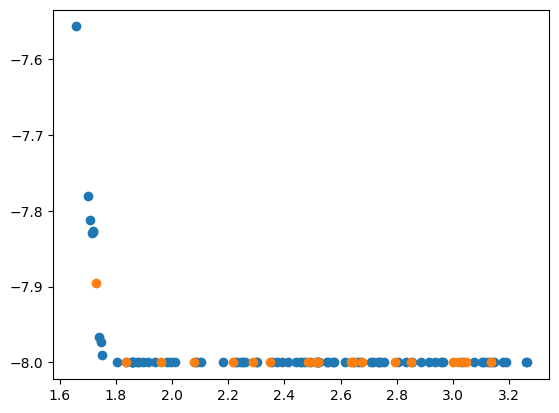

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 3.75974  validloss 4.22222±0.00000  bestvalidloss 4.22222  last_update 0
train: iter 1  trainloss 3.45506  validloss 3.87634±0.00000  bestvalidloss 3.87634  last_update 0
train: iter 2  trainloss 3.19505  validloss 3.52922±0.00000  bestvalidloss 3.52922  last_update 0
train: iter 3  trainloss 2.98543  validloss 3.29139±0.00000  bestvalidloss 3.29139  last_update 0
train: iter 4  trainloss 2.80308  validloss 3.09250±0.00000  bestvalidloss 3.09250  last_update 0
train: iter 5  trainloss 2.64652  validloss 2.90685±0.00000  bestvalidloss 2.90685  last_update 0
train: iter 6  trainloss 2.51885  validloss 2.74815±0.00000  bestvalidloss 2.74815  last_update 0
train: iter 7  trainloss 2.40169  validloss 2.61294±0.00000  bestvalidloss 2.61294  last_update 0
train: iter 8  trainloss 2.31099  validloss 2.50173±0.00000  bestvalidloss 2.50173  last_update 0
train: iter 9  trainloss 2.22643  validloss 2.39574±0.00000  bestvalidloss 2.39574  last_update 0
train: iter 10  trai

train: iter 89  trainloss 0.65743  validloss 0.58714±0.00000  bestvalidloss 0.57129  last_update 6
train: iter 90  trainloss 0.65749  validloss 0.58339±0.00000  bestvalidloss 0.57129  last_update 7
train: iter 91  trainloss 0.66840  validloss 0.58988±0.00000  bestvalidloss 0.57129  last_update 8
train: iter 92  trainloss 0.66338  validloss 0.60070±0.00000  bestvalidloss 0.57129  last_update 9
train: iter 93  trainloss 0.65324  validloss 0.57931±0.00000  bestvalidloss 0.57129  last_update 10
train: iter 94  trainloss 0.66817  validloss 0.59423±0.00000  bestvalidloss 0.57129  last_update 11
train: iter 95  trainloss 0.65571  validloss 0.56452±0.00000  bestvalidloss 0.56452  last_update 0
train: iter 96  trainloss 0.66274  validloss 0.59215±0.00000  bestvalidloss 0.56452  last_update 1
train: iter 97  trainloss 0.67013  validloss 0.59541±0.00000  bestvalidloss 0.56452  last_update 2
train: iter 98  trainloss 0.66286  validloss 0.58881±0.00000  bestvalidloss 0.56452  last_update 3
train: i

train: iter 176  trainloss 0.66347  validloss 0.58320±0.00000  bestvalidloss 0.56452  last_update 81
train: iter 177  trainloss 0.67400  validloss 0.59349±0.00000  bestvalidloss 0.56452  last_update 82
train: iter 178  trainloss 0.66145  validloss 0.59326±0.00000  bestvalidloss 0.56452  last_update 83
train: iter 179  trainloss 0.65476  validloss 0.58062±0.00000  bestvalidloss 0.56452  last_update 84
train: iter 180  trainloss 0.65503  validloss 0.58363±0.00000  bestvalidloss 0.56452  last_update 85
train: iter 181  trainloss 0.66674  validloss 0.59074±0.00000  bestvalidloss 0.56452  last_update 86
train: iter 182  trainloss 0.66304  validloss 0.58782±0.00000  bestvalidloss 0.56452  last_update 87
train: iter 183  trainloss 0.66360  validloss 0.58371±0.00000  bestvalidloss 0.56452  last_update 88
train: iter 184  trainloss 0.66320  validloss 0.57504±0.00000  bestvalidloss 0.56452  last_update 89
train: iter 185  trainloss 0.65928  validloss 0.58835±0.00000  bestvalidloss 0.56452  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 2.4164, -1.4984], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 20.56346  validloss 28.00070±0.00000  bestvalidloss 28.00070  last_update 0
train: iter 1  trainloss 10.90635  validloss 15.97000±0.00000  bestvalidloss 15.97000  last_update 0
train: iter 2  trainloss 6.48900  validloss 8.56959±0.00000  bestvalidloss 8.56959  last_update 0
train: iter 3  trainloss 4.76076  validloss 5.59098±0.00000  bestvalidloss 5.59098  last_update 0
train: iter 4  trainloss 3.88262  validloss 4.27886±0.00000  bestvalidloss 4.27886  last_update 0
train: iter 5  trainloss 3.39891  validloss 3.63839±0.00000  bestvalidloss 3.63839  last_update 0
train: iter 6  trainloss 3.07619  validloss 3.24304±0.00000  bestvalidloss 3.24304  last_update 0
train: iter 7  trainloss 2.87138  validloss 3.05591±0.00000  bestvalidloss 3.05591  last_update 0
train: iter 8  trainloss 2.78787  validloss 2.89631±0.00000  bestvalidloss 2.89631  last_update 0
train: iter 9  trainloss 2.67770  validloss 2.86144±0.00000  bestvalidloss 2.86144  last_update 0
train: iter 10

train: iter 83  trainloss 1.33393  validloss 1.30491±0.00000  bestvalidloss 1.21559  last_update 19
train: iter 84  trainloss 1.33341  validloss 1.20167±0.00000  bestvalidloss 1.20167  last_update 0
train: iter 85  trainloss 1.37330  validloss 1.26342±0.00000  bestvalidloss 1.20167  last_update 1
train: iter 86  trainloss 1.33087  validloss 1.28333±0.00000  bestvalidloss 1.20167  last_update 2
train: iter 87  trainloss 1.30727  validloss 1.28758±0.00000  bestvalidloss 1.20167  last_update 3
train: iter 88  trainloss 1.30892  validloss 1.31776±0.00000  bestvalidloss 1.20167  last_update 4
train: iter 89  trainloss 1.32528  validloss 1.22364±0.00000  bestvalidloss 1.20167  last_update 5
train: iter 90  trainloss 1.32772  validloss 1.27658±0.00000  bestvalidloss 1.20167  last_update 6
train: iter 91  trainloss 1.32292  validloss 1.25702±0.00000  bestvalidloss 1.20167  last_update 7
train: iter 92  trainloss 1.31758  validloss 1.26052±0.00000  bestvalidloss 1.20167  last_update 8
train: it

train: iter 167  trainloss 1.31653  validloss 1.31309±0.00000  bestvalidloss 1.20167  last_update 83
train: iter 168  trainloss 1.27895  validloss 1.22757±0.00000  bestvalidloss 1.20167  last_update 84
train: iter 169  trainloss 1.31514  validloss 1.23559±0.00000  bestvalidloss 1.20167  last_update 85
train: iter 170  trainloss 1.26919  validloss 1.33182±0.00000  bestvalidloss 1.20167  last_update 86
train: iter 171  trainloss 1.28819  validloss 1.18529±0.00000  bestvalidloss 1.18529  last_update 0
train: iter 172  trainloss 1.31141  validloss 1.24695±0.00000  bestvalidloss 1.18529  last_update 1
train: iter 173  trainloss 1.30364  validloss 1.29325±0.00000  bestvalidloss 1.18529  last_update 2
train: iter 174  trainloss 1.27017  validloss 1.19876±0.00000  bestvalidloss 1.18529  last_update 3
train: iter 175  trainloss 1.30991  validloss 1.25045±0.00000  bestvalidloss 1.18529  last_update 4
train: iter 176  trainloss 1.27857  validloss 1.25412±0.00000  bestvalidloss 1.18529  last_updat

train: iter 251  trainloss 1.29922  validloss 1.26981±0.00000  bestvalidloss 1.15375  last_update 29
train: iter 252  trainloss 1.29545  validloss 1.19924±0.00000  bestvalidloss 1.15375  last_update 30
train: iter 253  trainloss 1.28838  validloss 1.24541±0.00000  bestvalidloss 1.15375  last_update 31
train: iter 254  trainloss 1.33485  validloss 1.18404±0.00000  bestvalidloss 1.15375  last_update 32
train: iter 255  trainloss 1.27939  validloss 1.19638±0.00000  bestvalidloss 1.15375  last_update 33
train: iter 256  trainloss 1.26832  validloss 1.30061±0.00000  bestvalidloss 1.15375  last_update 34
train: iter 257  trainloss 1.30456  validloss 1.25029±0.00000  bestvalidloss 1.15375  last_update 35
train: iter 258  trainloss 1.28814  validloss 1.17414±0.00000  bestvalidloss 1.15375  last_update 36
train: iter 259  trainloss 1.29422  validloss 1.24273±0.00000  bestvalidloss 1.15375  last_update 37
train: iter 260  trainloss 1.28313  validloss 1.16291±0.00000  bestvalidloss 1.15375  last_

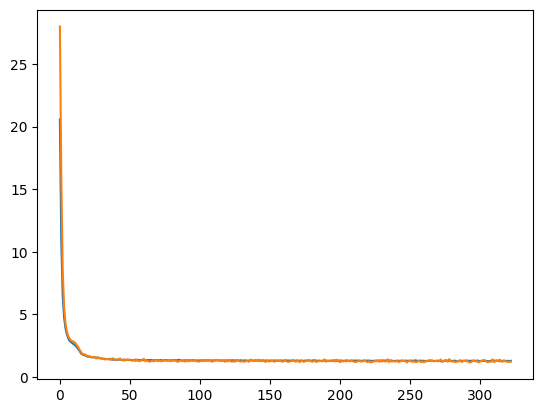

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.9180)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-1.3047)


In [21]:
print(vi.h_min_tilde)

-6.162121


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.6286746595676546
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

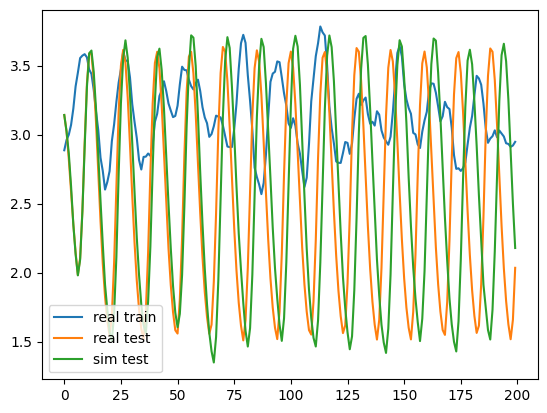

encoder [ 2.849589 -8.      ]
initial_belief tensor([ 2.4164, -1.4984])
real train tensor([ 2.7535, -8.0000])
real test tensor([ 2.8398, -8.0070])
sim tensor([ 2.8398, -8.0070])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


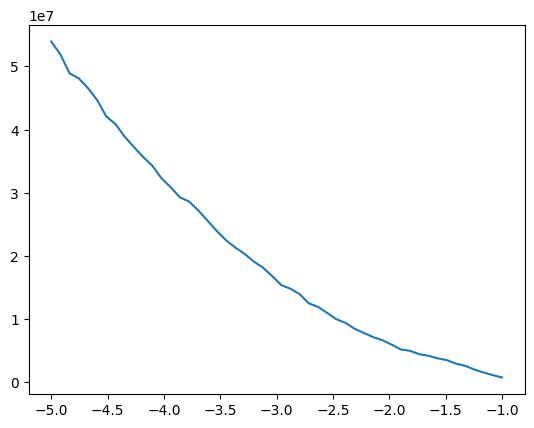

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-2.4288817342956186
tensor([1.8478])
